In [7]:
!gcc pi.c -o pi

In [8]:
import subprocess

nthreads = [1, 2, 4, 6, 8, 12, 16, 32]
npoints = [10**i for i in range(1, 10)]
ntries = 10

results = {i:[] for i in nthreads }
for nthread in nthreads:
    for npoint in npoints:
        total_t = 0
        for _ in range(ntries):
            process = subprocess.run(["./pi", str(nthread), str(npoint)], capture_output=True)
            pi, t = map(float, process.stdout.decode("utf-8").split(" "))
            total_t += t

        results[nthread].append(total_t / ntries)


1	 [0.00021780000000000004, 0.00021290000000000002, 0.0002441, 0.00034750000000000004, 0.0020332, 0.0200462, 0.1714694, 1.6543958999999997, 16.8024366]
2	 [0.0002134, 0.00023549999999999998, 0.00024960000000000005, 0.00032159999999999996, 0.0011048, 0.0090506, 0.08512519999999998, 0.8936268, 8.631423199999999]
4	 [0.0003683, 0.00034080000000000004, 0.0003598, 0.00043019999999999994, 0.0008324999999999999, 0.004897200000000001, 0.045751900000000005, 0.4492158, 4.5753962]
6	 [0.0005113, 0.0004881000000000001, 0.0005378000000000001, 0.0005705, 0.0008443999999999998, 0.0037279, 0.0316536, 0.3073066, 3.1381847]
8	 [0.0006549, 0.0007015, 0.0006555, 0.0007330999999999999, 0.0009622999999999999, 0.003357399999999999, 0.024396300000000003, 0.24213910000000002, 2.5628140000000004]
12	 [0.0009677000000000002, 0.0009151, 0.0009530000000000001, 0.0009943999999999999, 0.001273, 0.003787499999999999, 0.028234600000000006, 0.2021633, 1.8675951999999998]
16	 [0.0012477, 0.0013297, 0.0013276000000000002

[]

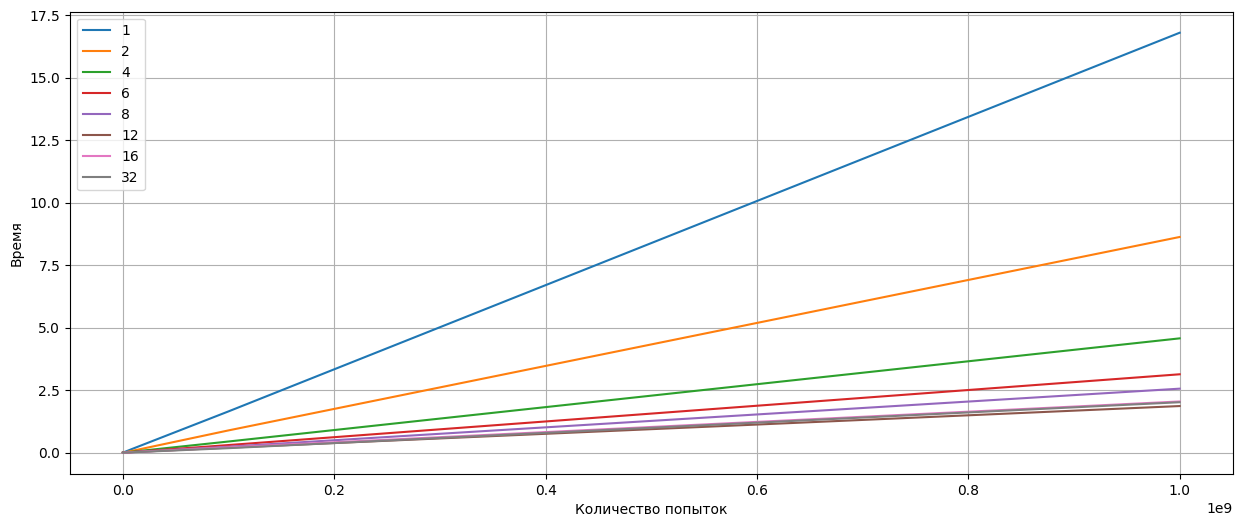

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.grid(True)
for n, times in results.items():
    print(f"{n}\t {times}")
    plt.plot(npoints, times, label=f"{n}")

plt.legend()
plt.xlabel("Количество попыток")
plt.ylabel("Время")
plt.plot()